Entwickeln Sie mit den interaktiven M&ouml;glichkeiten von Sage das Spiel <strong>Tic Tac Toe</strong>. Dabei soll ein Spieler in der Lage sein ein Kreuz zu setzen. Der vom Gegner gesetzte Kreis soll vom Computer (zuf&auml;llig) gesetzt werden. Hat einer der beiden Spieler gewonnen, soll es eine entsprechende Meldung geben.<br /><br />Sie k&ouml;nnen auch versuchen den Computergegner mit einer rudiment&auml;ren Intelligenz auszustatten.<br /><br />

Benutzt ipywidgets um das Spielfeld zu generieren.

<em>(Entspricht 6 Testaten)</em>  

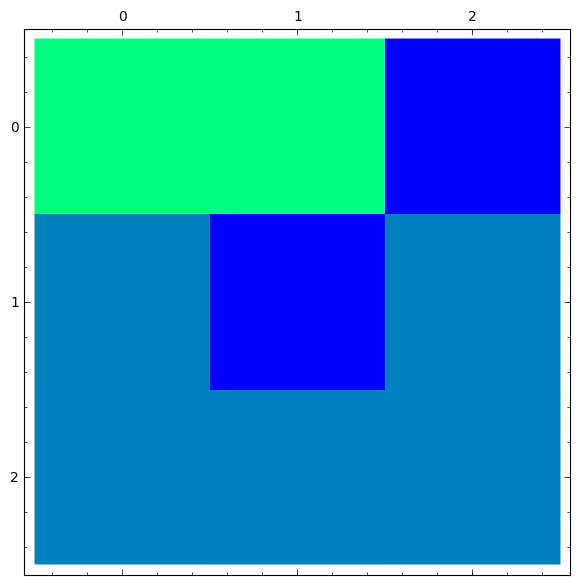

In [5]:
from ipywidgets import interact, interactive
from ipywidgets import IntText, HBox, VBox, Text, Button
from IPython.display import display, clear_output


global Mensch
global Computer
global Spielfeld
Mensch=[]
Computer=[]
#ganzzahlige Zufallszahl zwischen 0 und max
def Zufallszahl(max):
    return int(round(random()*max))
def Zufallskoord():
    return (Zufallszahl(2),Zufallszahl(2))
def Computerwahl(M, C):
    Koordinate=Zufallskoord()
    while (Koordinate in C or Koordinate in M):
        Koordinate = Zufallskoord()
    return Koordinate
def gewonnen(A):
    #3 in einer Reihe?
    for reihe in [0..2]:
        R=[x for x in A if x[0]==reihe]
        if len(R)==3:
            #print 'Reihe'
            #print reihe 
            return true
    #3 in einer Spalte?
    for spalte in [0..2]:
        S=[y for y in A if y[1]==spalte]
        if len(S)==3:
            #print 'Spalte'
            #print spalte
            return true
    #3 Diagonal?
    if (1,1) in A and (0,0) in A and (2,2) in A:
        #print 'Diagonale rd'
        return true 
    if (0,2) in A and (1,1) in A and (2,0) in A:
        #print 'Diagonale ru'
        return true
    return false
queens=[]

# create matrix widget
#tlist = []
#for i in [0..2]:
#    MiHlist = []
#    for j in [0..2]:
#        MiHlist.append(Text())
#    tlist.append(VBox(MiHlist))
Koordinate1 = IntText (value= "0")
Koordinate2 = IntText (value = "0")



def setze(_):
    global Mensch
    global Computer
    if (Koordinate1,Koordinate2) not in Mensch and (Koordinate1,Koordinate2) not in Computer:
        if Koordinate1>2 or Koordinate2>2:
            print 'Koordinate ist nicht im Spielfeld, \n Bitte neue Wahl treffen!'
        else:
            Mensch.append((Koordinate1.value, Koordinate2.value))
            if gewonnen(Mensch):
                print 'Gewonnen !!!'
            else:
                Computer.append(Computerwahl(Mensch, Computer))
                if gewonnen(Computer):
                    print 'leider verloren'
    else:
        print 'Position ist schon besetzt, bitte eine andere Position wählen!'  
    clear_output()
    showfeld()
    
    
    
def showfeld():
    global Mensch
    global Computer
    global Spielfeld
    #Gesetzte Figuren anzeigen
    for x,y in Mensch:
        for i in range(3):
            for j in range(3):
                if x==i and y==j:
                     Spielfeld[x,y]=100
    for x,y in Computer:
        for i in range(3):
            for j in range(3):
                if x==i and y==j:
                     Spielfeld[x,y]=-100
    show(matrix_plot(Spielfeld, cmap='winter' ))   
            
def neustart(_):
    global Mensch
    global Computer
    global Spielfeld
    Mensch = []
    Computer = []
    Spielfeld = matrix(ZZ,3,3)
    #Spielfeld initialisieren
    for x in range(3):
        for y in range(3):
            Spielfeld[x,y]=(x+y)%2
    showfeld()
    
    
a = Button(description='Setze Stein')
b = Button(description='Neustart')


a.on_click(setze)
b.on_click(neustart)

display(Koordinate1)
display(Koordinate2)
display(a)
display(b)

neustart(_)